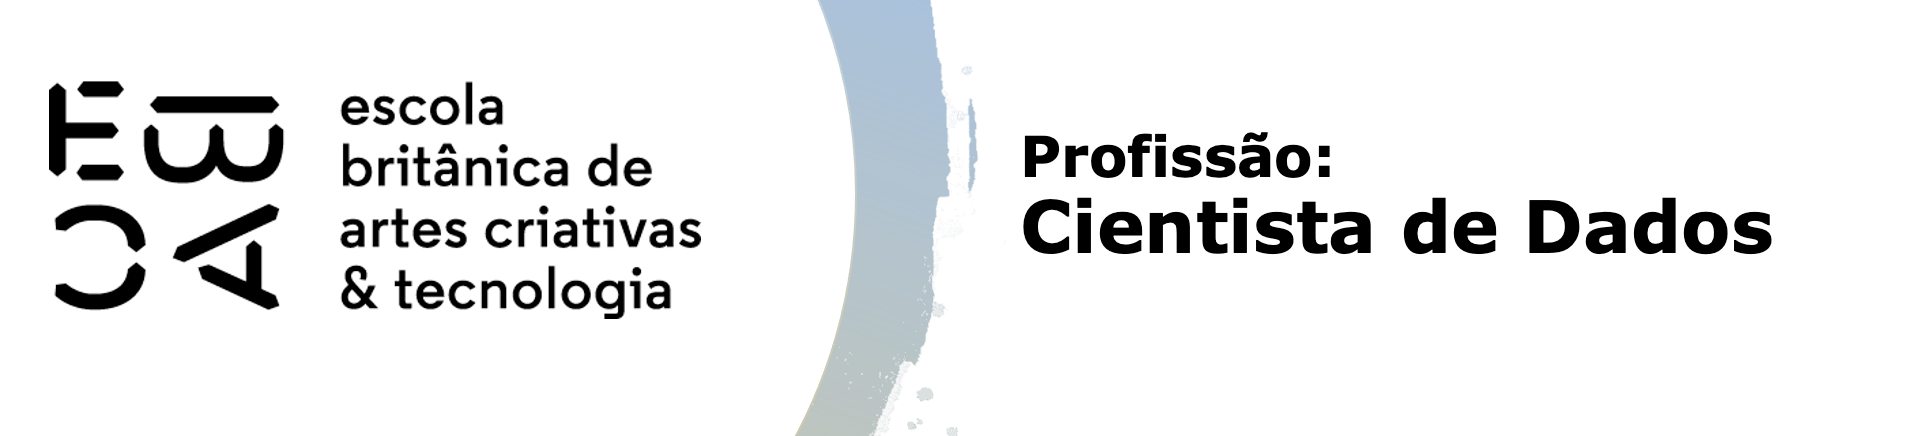

# Tarefa

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
from statsmodels.stats.weightstats import ttest_ind

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

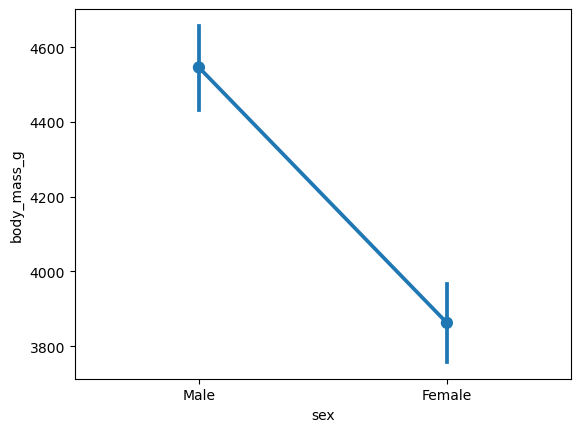

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [13]:
len(pg)

344

- Hipótese nula (**$H_0$**): diferença entre as médias de peso entre machos e fêmeas é zero.
- Hipótese alternativa (**$H_a$**): média de peso dos machos é maior que a média de peso das fêmeas.

In [54]:
# desvio padrão de cada grupo 
desvpad_M = pg.groupby('sex')['body_mass_g'].var()['Male'].mean()**.5
desvpad_F = pg.groupby('sex')['body_mass_g'].var()['Female'].mean()**.5

# média de cada grupo
media_M = pg.groupby('sex')['body_mass_g'].mean()['Male']
media_F = pg.groupby('sex')['body_mass_g'].mean()['Female']

#diferença entre médias
dif_med = media_M - media_F

#erro padrão
erro_pad = (((desvpad_M**2 + desvpad_F**2)/2)**.5) * (2/len(pg))**.5

#estatística do test
t = dif_med / erro_pad

#graus de liberdade
gl = len(pg) -2

# Região crítica: sob h0, t está na RC 5% das vezes
RC = st.t.ppf(.95, gl)        

# p-value: a menor significância para a qual rejeitamos o teste
p_value = 1-st.t.cdf(t, gl)     


print(f'Diferença entre médias: {dif_med:.2f}')
print(f'Erro padrão: {erro_pad:.2f}')
print(f'Estatística do teste: {t:.2f}')
print(f'Região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.20f} ou mais')

Diferença entre médias: 683.41
Erro padrão: 55.62
Estatística do teste: 12.29
Região crítica: 1.65 ou mais
p-value: 0.00000000000000000000 ou mais


In [23]:
# Interpretação dos resultados
if t > RC:
    print("Estatística do teste > Região crítica")
else:
    print("Estatística do teste < Região crítica")
    
if p_value < 0.05:
    print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
else:
    print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")


Estatística do teste > Região crítica
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

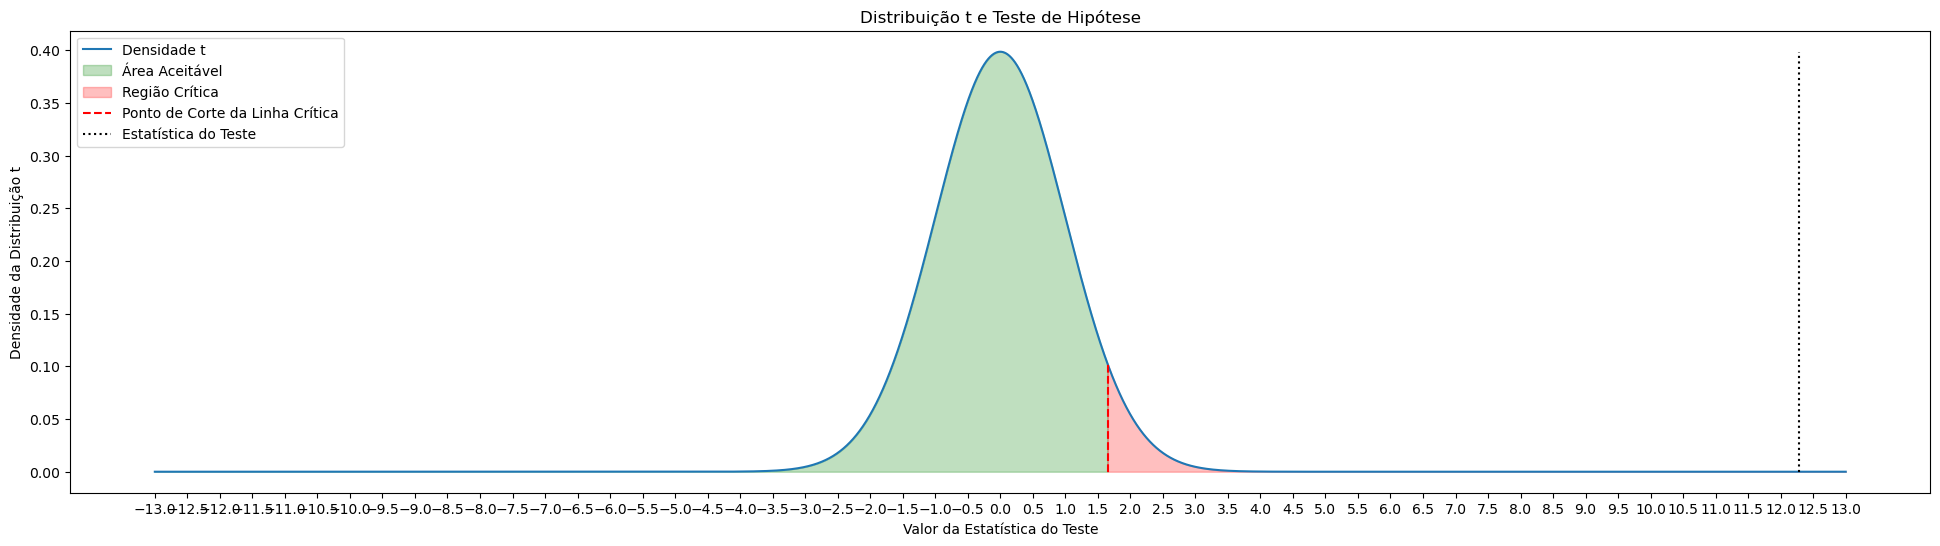

A probabilidade para valores entre 1,65 e inf é de 5,00%


In [34]:
# Representação gráfica do teste
fig, ax = plt.subplots(figsize=(24, 6))

# Parâmetros da densidade sob a hipótese nula
mu = 0 # média
variance = 1 # variância
sigma = variance**.5 # desvio padrão

# Valores de X e Y para plotar a densidade da distribuição t
x = np.linspace(np.floor(mu-(t*sigma)), np.ceil(mu+(t*sigma)), 100000)
y = st.t.pdf(x, gl)

# Gráfico da densidade
ax.plot(x, y, label='Densidade t')

# Região Crítica
low = st.t.ppf(.95, gl, loc=0, scale=1)
high = np.inf

# Área aceitável
ax.fill_between(x, y, where=(x<low), alpha=0.25, label='Área Aceitável', color='green')

# Área da região crítica
ax.fill_between(x, y, where=(x>low)&(x<high), alpha=0.25, label='Região Crítica', color='red')

# Linha vertical para o ponto crítico da linha crítica
ax.vlines(x=RC, ymin=y.min(), ymax=st.t.pdf(RC, gl), color='r', linestyle='--', label='Ponto de Corte da Linha Crítica')

# Linha vertical para a estatística do teste
ax.vlines(x=t, ymin=y.min(), ymax=y.max(), color='black', linestyle='dotted', label='Estatística do Teste')

# Ajustar a quantidade de marcas no eixo x
ax.set_xticks(np.arange(x.min(), x.max()+.5, .5))

# Legenda e rótulos
ax.legend(loc='upper left')
ax.set_title('Distribuição t e Teste de Hipótese')
ax.set_xlabel('Valor da Estatística do Teste')
ax.set_ylabel('Densidade da Distribuição t')

plt.show()

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, gl) - st.t.cdf(low, gl)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [65]:
for specie in pg['species'].unique():
    # desvio padrão de cada grupo 
    desvpad_M = pg.groupby(['sex', 'species'])['body_mass_g'].var()['Male', specie].mean()**.5
    desvpad_F = pg.groupby(['sex', 'species'])['body_mass_g'].var()['Female', specie].mean()**.5
    
    # média de cada grupo
    media_M = pg.groupby(['sex', 'species'])['body_mass_g'].mean()['Male', specie]
    media_F = pg.groupby(['sex', 'species'])['body_mass_g'].mean()['Female', specie]
    
    #diferença entre médias
    dif_med = media_M - media_F
    
    #erro padrão
    erro_pad = (((desvpad_M**2 + desvpad_F**2)/2)**.5) * (2/len(pg))**.5
    
    #estatística do test
    t = dif_med / erro_pad
    
    #graus de liberdade
    gl = len(pg) -2
    
    # Região crítica: sob h0, t está na RC 5% das vezes
    RC = st.t.ppf(.95, gl)        
    
    # p-value: a menor significância para a qual rejeitamos o teste
    p_value = 1-st.t.cdf(t, gl) 
    
    print(f'''

    Diferença entre médias da espécie {specie}: {dif_med:.2f}
    Erro padrão da espécie {specie}: {erro_pad:.2f}
    Estatística do teste da espécie {specie}: {t:.2f}
    Região crítica da espécie {specie}: {RC:.2f} ou mais
    p-value da espécie {specie}: {p_value:.20f} ou mais
    
    ''')
    
    
    # Interpretação dos resultados
    if t > RC:
        print("Estatística do teste > Região crítica")
    else:
        print("Estatística do teste < Região crítica")
    
    if p_value < 0.05:
        print("P-value < 5% \n\n Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.")
    else:
        print("P-value > 5% \n\n Não há evidências suficientes para rejeitar a hipótese nula. Não há diferença significativa no peso entre machos e fêmeas.")

    




    Diferença entre médias da espécie Adelie: 674.66
    Erro padrão da espécie Adelie: 23.68
    Estatística do teste da espécie Adelie: 28.49
    Região crítica da espécie Adelie: 1.65 ou mais
    p-value da espécie Adelie: 0.00000000000000000000 ou mais
    
    
Estatística do teste > Região crítica
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


    Diferença entre médias da espécie Chinstrap: 411.76
    Erro padrão da espécie Chinstrap: 24.86
    Estatística do teste da espécie Chinstrap: 16.56
    Região crítica da espécie Chinstrap: 1.65 ou mais
    p-value da espécie Chinstrap: 0.00000000000000000000 ou mais
    
    
Estatística do teste > Região crítica
P-value < 5% 

 Rejeitar a hipótese nula. Há evidências de que o peso dos machos é significativamente maior que o peso das fêmeas.


    Diferença entre médias da espécie Gentoo: 805.09
    Erro padrão da espécie Gentoo: 22.71
    Estatísti

In [72]:
import numpy as np

# Números fornecidos
numeros = [10, 2, 15, 11, 9, 3, 7, 15, 12, 5, 8]

# Calculando a variância
variancia = np.var(numeros)

print("A variância dos números é:", variancia)


A variância dos números é: 17.421487603305785


In [79]:
import numpy as np

# Números fornecidos
numeros = [10, 2, 15, 11, 9, 3, 7, 15, 12, 5, 8]

varian = st.variation(numeros)
varian

0.4733294962164534